In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/fake_job_postings.csv")
print(df.shape)
print(df.columns)
df.head()

(17880, 18)
Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')


job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [3]:
df = df.drop(columns=[
    "job_id", "telecommuting", "has_company_logo", "has_questions","salary_range", "benefits", "department"
])

In [4]:
df = df.dropna(subset= ['description', 'requirements'])

In [5]:
df['text'] = df['title'] + " " + df['description'] + " " + df['requirements']

In [6]:
df['text'].head()

0    Marketing Intern Food52, a fast-growing, James...
1    Customer Service - Cloud Video Production Orga...
2    Commissioning Machinery Assistant (CMA) Our cl...
3    Account Executive - Washington DC THE COMPANY:...
4    Bill Review Manager JOB TITLE: Itemization Rev...
Name: text, dtype: object

In [7]:
import nltk

In [8]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/princesingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/princesingh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/princesingh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    words = word_tokenize(text)  
    words = [word for word in words if word not in stop_words] 
    return " ".join(words)

In [10]:
df['clean_text'] = df['text'].apply(clean_text)

In [11]:
df[['text', 'clean_text']].head()

text  \
0  Marketing Intern Food52, a fast-growing, James...   
1  Customer Service - Cloud Video Production Orga...   
2  Commissioning Machinery Assistant (CMA) Our cl...   
3  Account Executive - Washington DC THE COMPANY:...   
4  Bill Review Manager JOB TITLE: Itemization Rev...   

                                          clean_text  
0  marketing intern food52 fastgrowing james bear...  
1  customer service cloud video production organi...  
2  commissioning machinery assistant cma client l...  
3  account executive washington dc company esri –...  
4  bill review manager job title itemization revi...

In [12]:
X = df['text']

In [13]:
y = df['fraudulent']

In [14]:
X_raw = df['clean_text'].astype(str).fillna('').reset_index(drop=True)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
text_data = df['text']
labels = df['fraudulent']
X_raw = df['clean_text'].astype(str).fillna('').reset_index(drop=True)
X_train_text, X_test_text, y_train, y_test = train_test_split(X_raw,labels, test_size= 0.2, random_state=42)
X_test_raw = X_test_text.reset_index(drop=True)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train = tfidf_vectorizer.fit_transform(X_train_text)
X_test = tfidf_vectorizer.transform(X_test_text)
X = tfidf_vectorizer.fit_transform(df['clean_text'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
                                                

In [20]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(12147, 5000) (3037, 5000)
(12147,) (3037,)


In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: divide by zero encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: overflow encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: invalid value encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)


LogisticRegression(max_iter=1000)

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9611458676325321

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      2876
           1       0.98      0.27      0.43       161

    accuracy                           0.96      3037
   macro avg       0.97      0.64      0.70      3037
weighted avg       0.96      0.96      0.95      3037



In [26]:
import seaborn as sns

In [27]:
import matplotlib.pyplot as plt

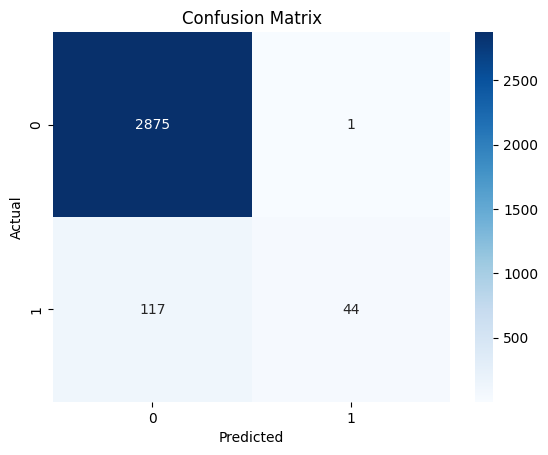

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("../visuals/confusion_matrix.png")
plt.show()

In [29]:
from lime.lime_text import LimeTextExplainer
import numpy as np

In [30]:
explainer = LimeTextExplainer(class_names=['Real', 'Fake'])

In [31]:
def predict_proba(texts):
    if isinstance(texts, str):
        texts = [texts]
    return model.predict_proba(tfidf_vectorizer.transform(texts))

In [32]:
sample_index = 0
sample_text = X_test_text.iloc[1]
print("Text:\n", sample_text)

Text:
 director content marketing director content marketing passionate experienced marketer lead content marketing efforts vision growth person work ensure content fresh full practical advice always engaging customers potential users help identify content goals strategies work rest marketingcontent team achieve goals drive awareness ultimately achieve sales product successful candidate must solid understanding inbound marketing lead generation well expertise creating engaging content highlytechnical audience ideal candidate seen expert b2b marketing space loves write – mean really loves write person able articulate business compelling way much marketer content editorhelp maintain master coschedule editorial calendar continually strengthen approach content marketingcraft newsletters social media content contribute coschedule blogcoordinate writing content contributors including freelancers guest authors staff writersexplore editorial partnerships content distribution options content ou

In [33]:
sample_index = 1
sample_text = X_test_text.iloc[2]
print("Text:\n", sample_text)

Text:
 wf17 9lu customer service apprenticeship fantastic opportunity someone wanting start career customer service first 12 months work towards level 2 customer service nvq kept permanent positionyou working distribution company role involveproviding high level customer service conversationworking alongside marketing team assist daily tasksthese tasks include adding new productsinputting information contacting service providersideal candidates computer literate excellent communication skillsif honest hard working send cv email0e92123d11734167533acc44a2e74ffac0b6f56d256225a89769e0641a3d1aee government funding available 1618 year olds job apprenticeship


In [34]:
sample_index = 2
sample_text = X_test_text.iloc[3]
print("Text:\n", sample_text)

Text:
 video journalist dari pashto language video journalist shall least five years current experience video journalist shall perform combination services respect acquiring news video content including researching photographing lighting editing producing video journalist shall provide video photography editing services go beyond standard camera operation video journalist shall well versed video photographic styles techniques able tell story pictures video journalist shall required serve producer television news feature stories video journalist shall required serve video editor script timed video shots natural sound emerges actualities complete suggested visual audio graphic efforts andor perform desktop video editing practical video journalist shall familiar agency ’ best practices guide shall adhere policies video journalist shall properly complete daily tasks daily tasks include limited performing basic functions video assignments fails twice per week preparing video elements assign

In [35]:
sample_index = 3
sample_text = X_test_text.iloc[0]
print("Text:\n", sample_text)

Text:
 intern businessproducer team aspiring producers business leads looking gain handson experience digital business come support mediamonks business amp producer team hilversum headquarters twenty minutes outside amsterdam search inspired intern eager expand knowledge international business interactive advertising logistics caffeinemediamonks offering opportunity develop client service producer skills well competitive payment cover expenses part biggest creative digital production company planet ’ producing worldclass work top global advertising agencies desired candidate enthusiastic individual passion digital process finishing hbo academic studies ideally dutch firstlanguage confident ability speak read write englishthe internship span five seven months forty hours week potential internship result career us fact tangible testament unadulterated epicness internships many exinterns still part team – first interns join mediamonks occupying key positions company therefore looking some

In [36]:
sample_index = 4
sample_text = X_test_text.iloc[10]
print("Text:\n", sample_text)

Text:
 food aide cashier brighter choice charter schools seeking motivated qualified candidates join nutrition department either parttime food aide cashier 201415 school yearposition summary parttime food aide cashier work collaboratively nutritional staff prepare serve food cafeteria students teachers operate steam table salad bar main entrée beverage area check temperature quality prepared foods maintain cleanliness sanitation work area equipment may also organize prepare assemble food itemsabout brighter choice charter schoolsthe mission brighter choice charter schools ensure bccs scholars opportunities future success students attending best public schools region three significant components achieving mission exemplary instruction ensures competency mastery reading writing mathematics focus development social behavioral organizational skills necessary future school success education beyond basics includes performing arts visual arts science history food aide cashier job description 

In [37]:
exp = explainer.explain_instance(sample_text, predict_proba, num_features=10)
exp.show_in_notebook(text = True)

/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/linear_model/_base

In [38]:
exp.save_to_file('../visuals/lime_explanation_sample0.html')

In [39]:
sample_index = 5
exp = explainer.explain_instance(X_test_raw[sample_index], predict_proba, num_features=10)
exp.show_in_notebook(text = True)

/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/linear_model/_base

In [40]:
sample_index = 99
exp = explainer.explain_instance(X_test_raw[sample_index], predict_proba, num_features=10)
exp.show_in_notebook(text = True)

/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/linear_model/_base

In [41]:
exp.save_to_file('../visuals/lime_explanation_sample99_real.html')

In [42]:
sample_index = 499
exp = explainer.explain_instance(X_test_raw[sample_index], predict_proba, num_features=10)
exp.show_in_notebook(text = True)

/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/linear_model/_base

In [43]:
import shap
from shap.explainers import Linear
import numpy as np
import matplotlib.pyplot as plt

/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [44]:
X_sample_raw = X_test_raw[:500]
X_sample_vec = tfidf_vectorizer.transform(X_sample_raw)

In [45]:
X_sample_vec = X_test[:500]

In [46]:
X_sample = X_test_raw[:500]

In [47]:
def shap_predict(texts):
    X_vec = tfidf_vectorizer.transform(texts)
    return model.predict_proba(X_vec)

In [48]:
explainer = Linear(model, X_sample_vec)

In [49]:
shap_values = explainer(X_sample_vec)

In [50]:
print(type(shap_values))

<class 'shap._explanation.Explanation'>


In [51]:
print(shap_values)

.values =
array([[ 1.44353451e-04, -1.35354085e-03, -9.99595408e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.44353451e-04, -1.35354085e-03, -9.99595408e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.44353451e-04, -1.35354085e-03, -9.99595408e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       ...,
       [ 1.44353451e-04, -1.35354085e-03, -9.99595408e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.44353451e-04, -1.35354085e-03, -9.99595408e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.44353451e-04, -1.35354085e-03, -9.99595408e-05, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

.base_values =
array([-3.81792832, -3.81792832, -3.81792832, -3.81792832, -3.81792832,
       -3.81792832, -3.81792832, -3.81792832, -3.81792832, -3.81792832,
       -3.81792832, -3.81792832, -3.81792832, -3.81792832, -3.81792832,
 

In [52]:
shap_values.values.shape

(500, 5000)

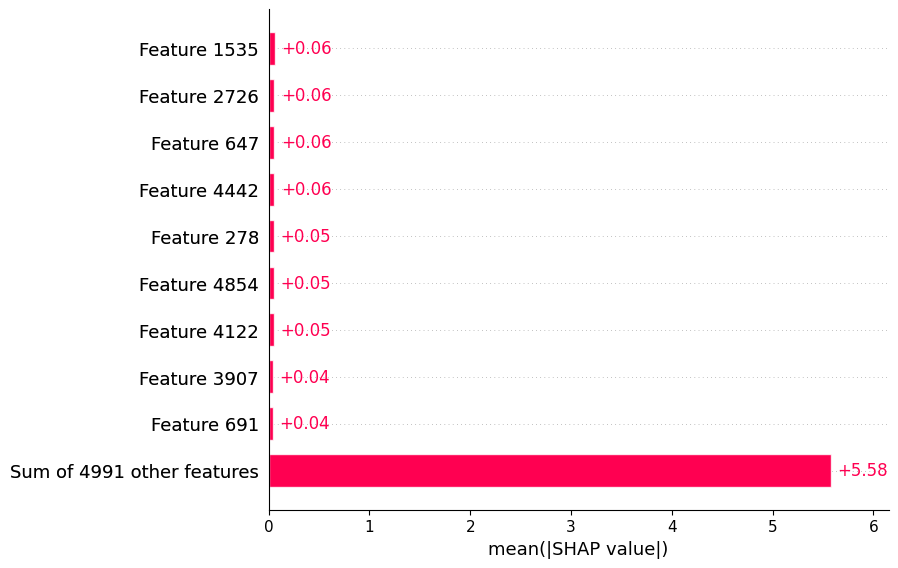

In [53]:
shap.plots.bar(shap_values)

In [54]:
feature_names = tfidf_vectorizer.get_feature_names_out()

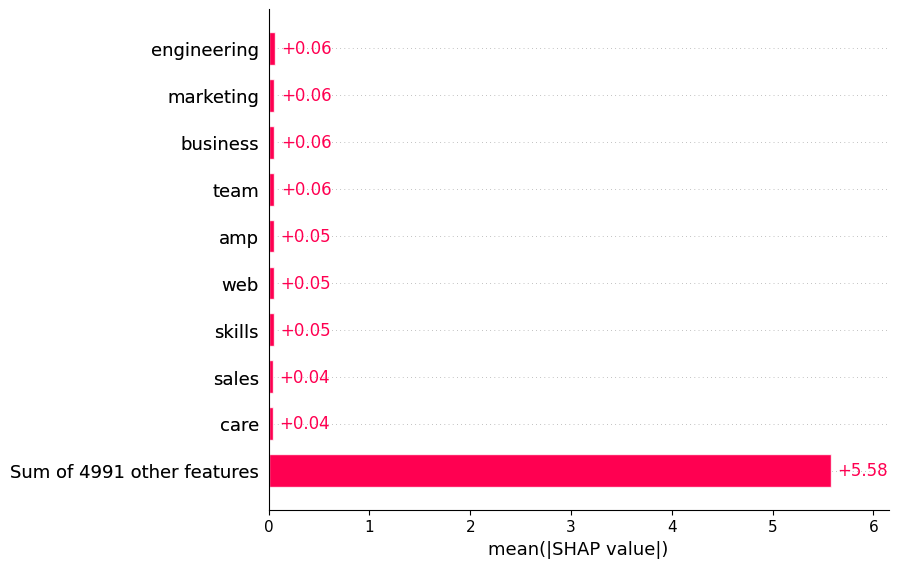

In [55]:
explainer = shap.explainers.Linear(model, X_sample_vec, feature_names=feature_names)
shap_values = explainer(X_sample_vec)
shap.plots.bar(shap_values)

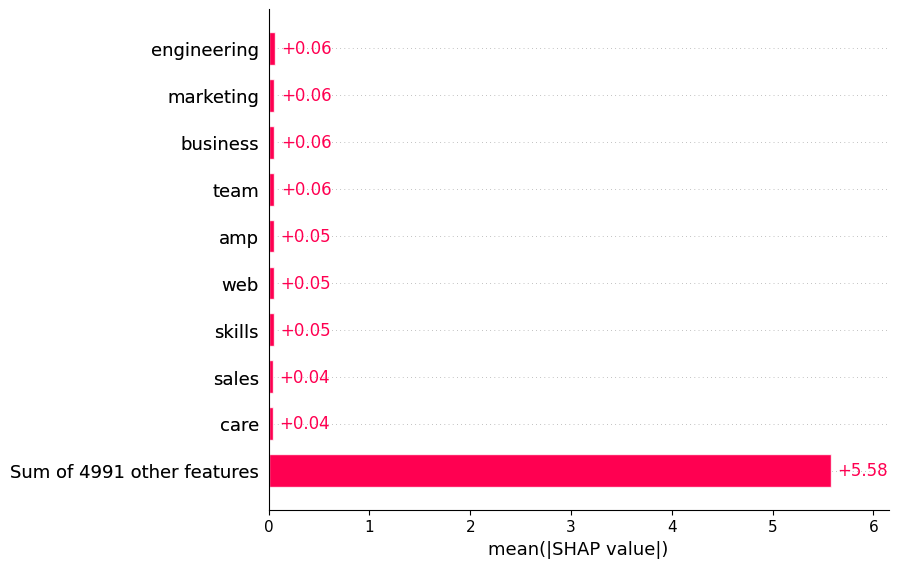

In [56]:
plt.figure()
shap.plots.bar(shap_values, show = False)
plt.savefig('../visuals/shap_summary_plot.png', bbox_inches= 'tight')

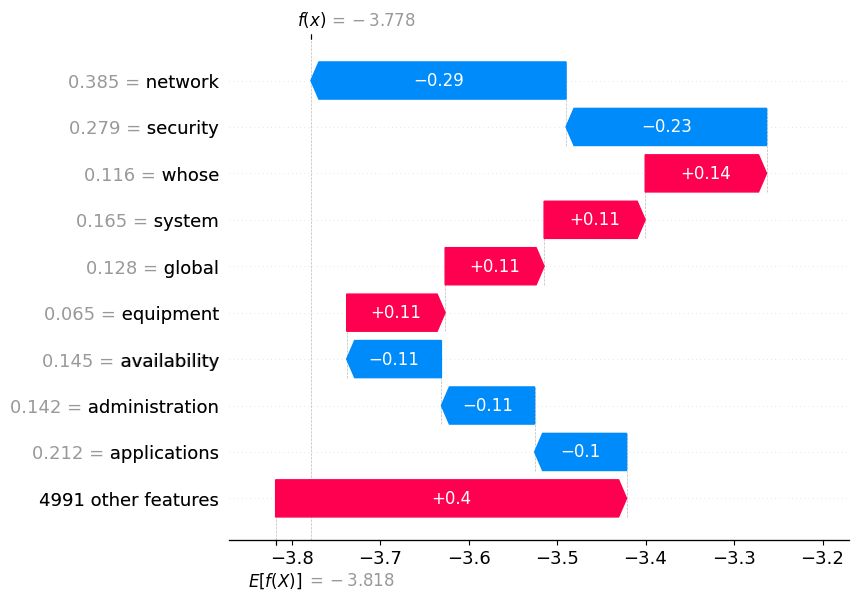

In [57]:
shap.plots.waterfall(shap_values[456])

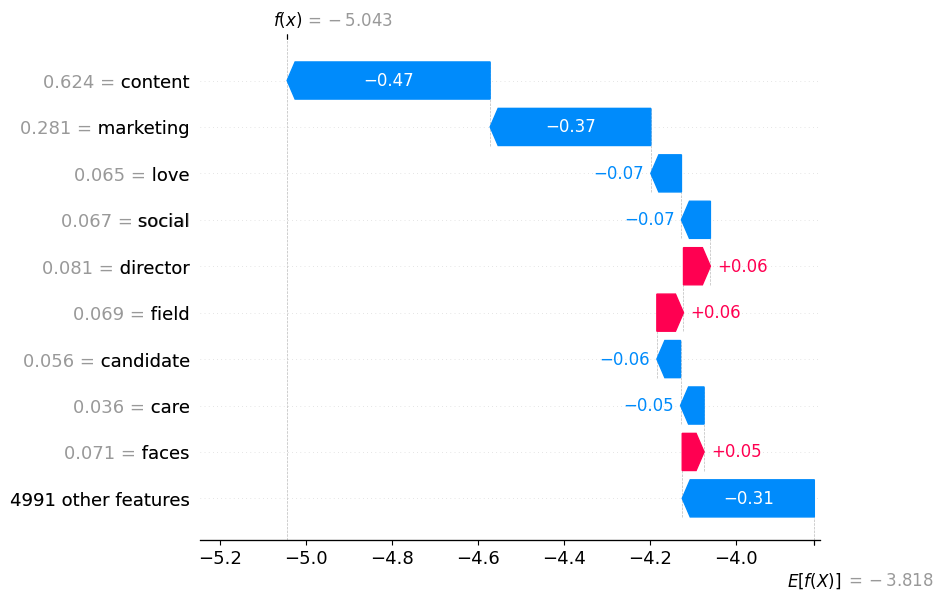

In [58]:
shap.plots.waterfall(shap_values[1])

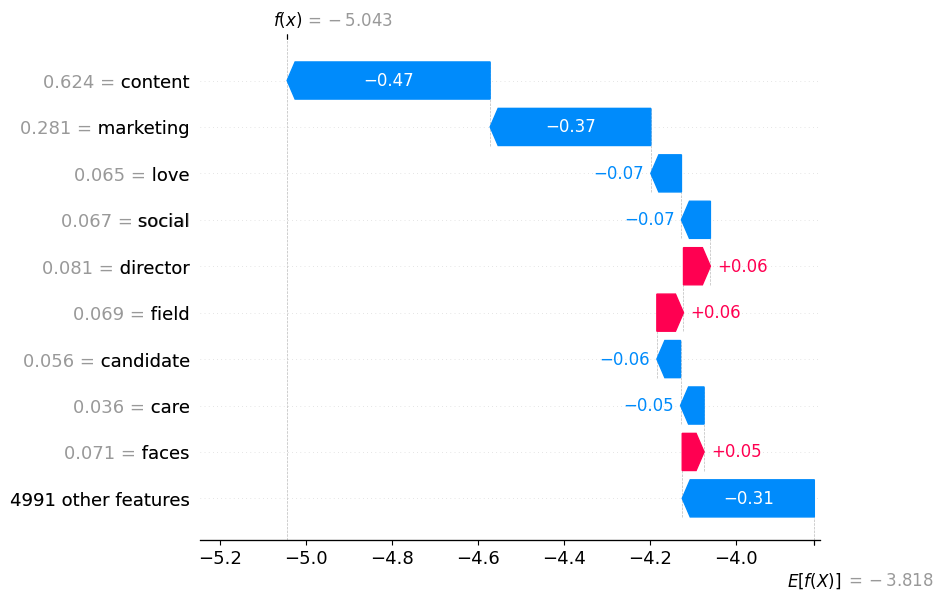

In [59]:
plt.figure()
shap.plots.waterfall(shap_values[1], show = False)
plt.savefig('../visuals/shap_waterfall_sample1.png', bbox_inches= 'tight')

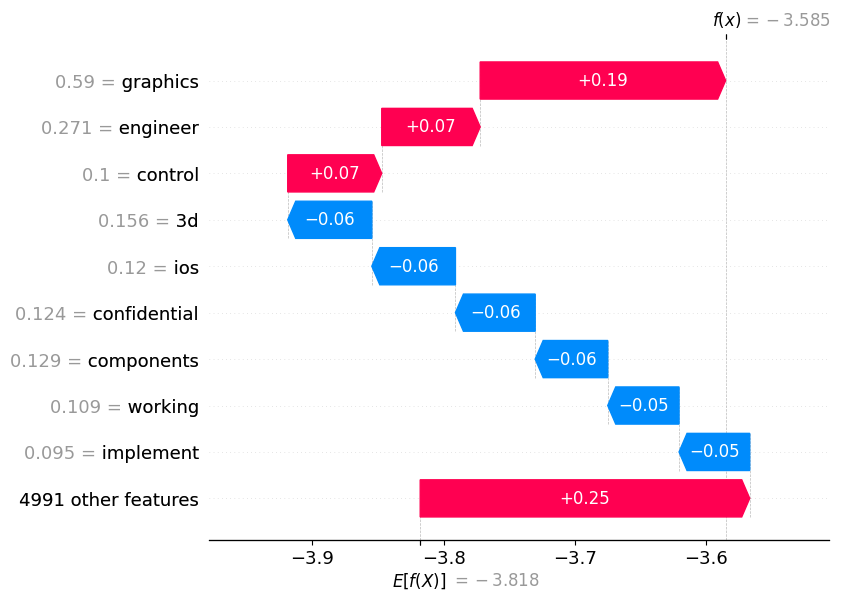

In [60]:
shap.plots.waterfall(shap_values[6])

In [61]:
plt.figure()
shap.plots.waterfall(shap_values[6], show = False)
plt.savefig('../visuals/shap_waterfall_sample2.png', bbox_inches= 'tight')

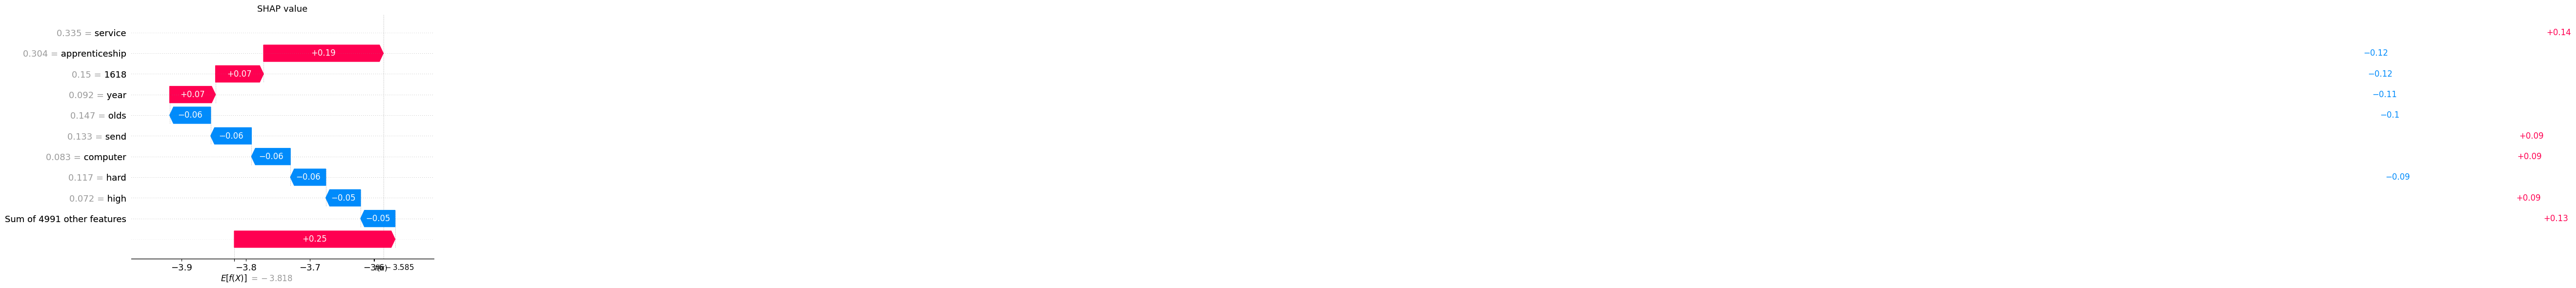

In [62]:
shap.plots.bar(shap_values[2])

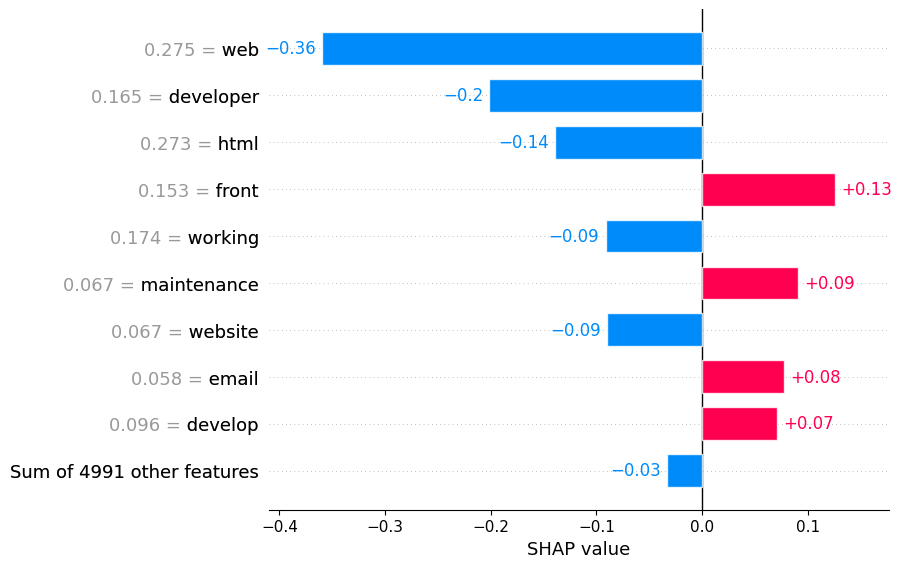

In [63]:
shap.plots.bar(shap_values[499])

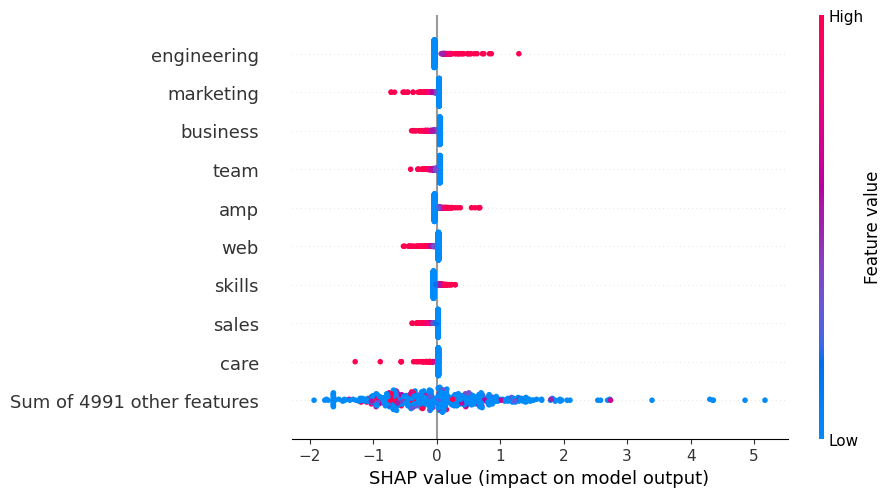

In [64]:
shap.plots.beeswarm(shap_values)

In [65]:
plt.figure()
shap.plots.beeswarm(shap_values, show = False)
plt.savefig('../visuals/shap_beeswarm_plot.png', bbox_inches= 'tight')

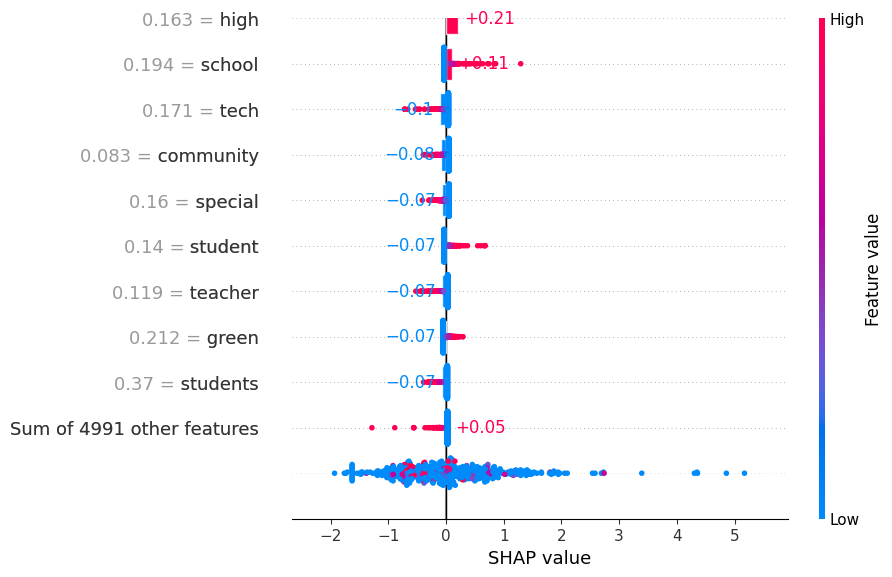

In [66]:
shap.plots.bar(shap_values[479])

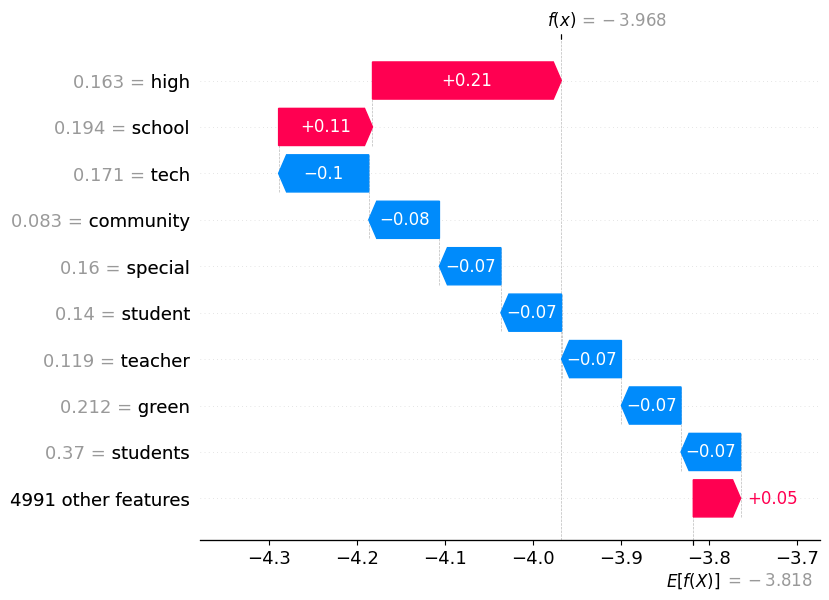

In [67]:
 shap.plots.waterfall(shap_values[479])

In [68]:
# Model Comparison and Evaluation

In [69]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [70]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [71]:
models = {
    "Logistic Regression" : LogisticRegression(max_iter=1000),
    "Random Forest" : RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost" : XGBClassifier(use_label_encoder=False, eval_metric = 'logloss'),
    "SVM" : SVC(kernel= 'linear'),
    "Naive Bayes" : MultinomialNB()
}

In [72]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
    "Model": name,
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score":f1_score(y_test , y_pred),
    })

/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: divide by zero encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: overflow encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/sklearn/linear_model/_linear_loss.py:209: RuntimeWarning: invalid value encountered in matmul
  norm2_w = weights @ weights if weights.ndim == 1 else squared_norm(weights)
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:21:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [73]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1 Score", ascending = False)
results_df.reset_index(drop= True, inplace = True)

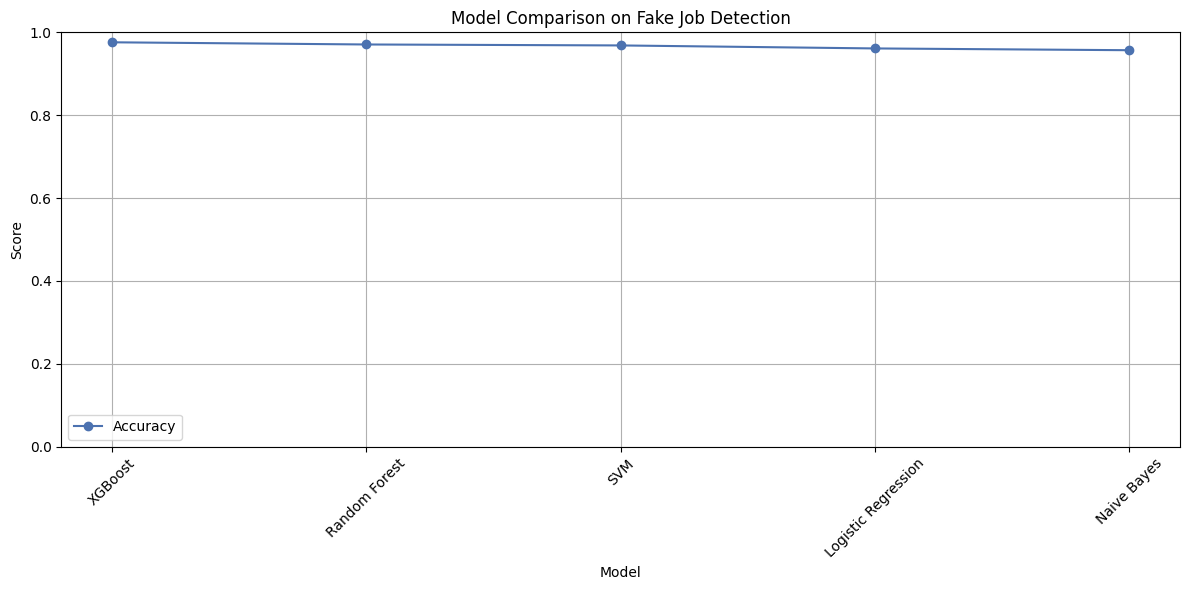

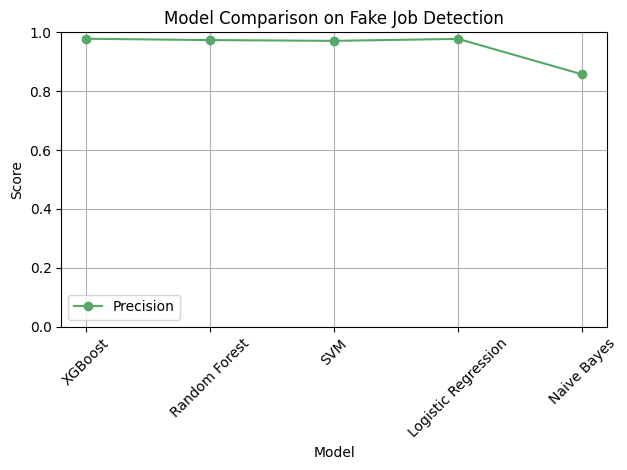

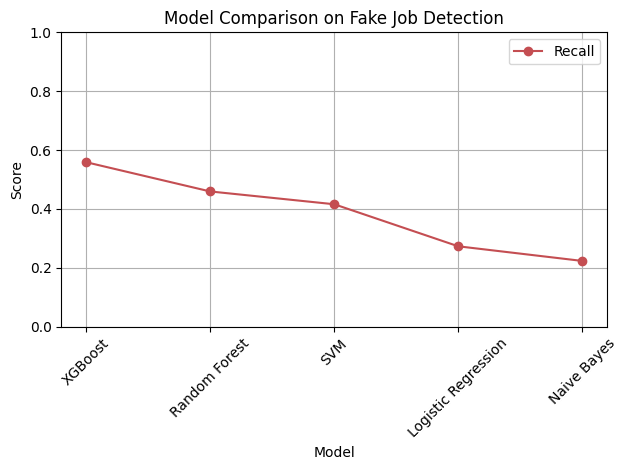

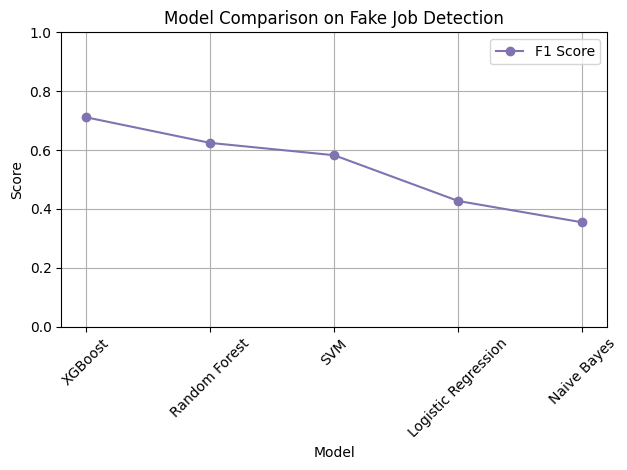

In [74]:
import matplotlib.pyplot as plt

metrics = ["Accuracy", "Precision","Recall", "F1 Score"]
colors = ["#4c72b0","#55a868", "#c44e52", "#8172b2"]

plt.figure(figsize= (12,6))
for i, metric in enumerate(metrics):
    plt.plot(results_df["Model"], results_df[metric], marker ='o', label = metric , color=colors[i])

    plt.title("Model Comparison on Fake Job Detection")
    plt.xlabel("Model")
    plt.ylabel("Score")
    plt.ylim(0,1)
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('../visuals/model_comparison_multimetric.png', dpi=300)
    plt.show()

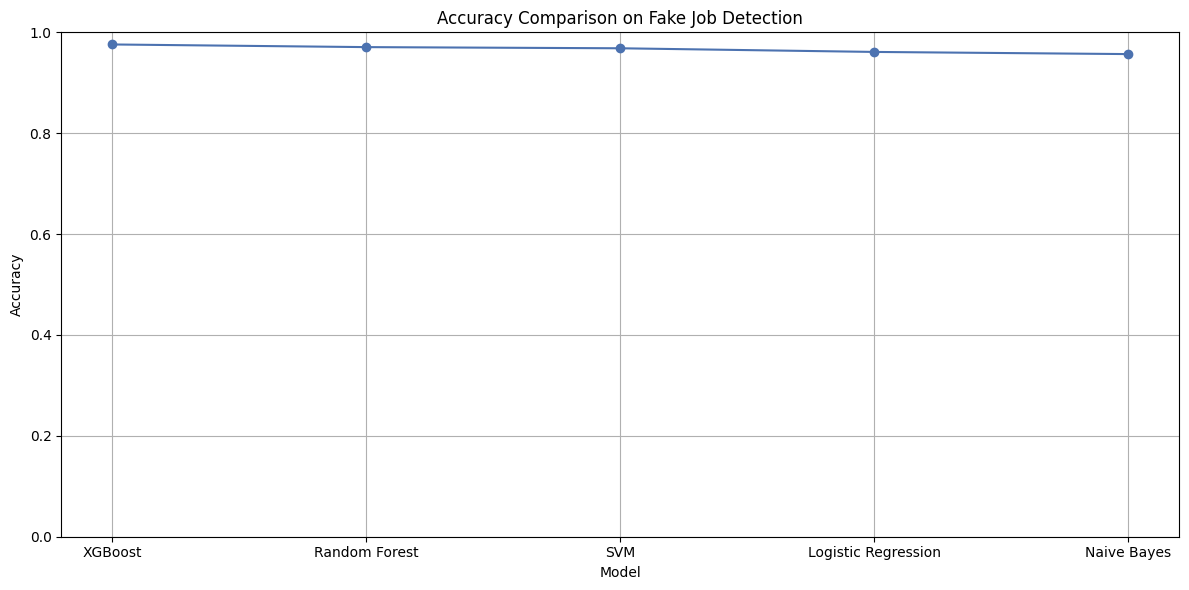

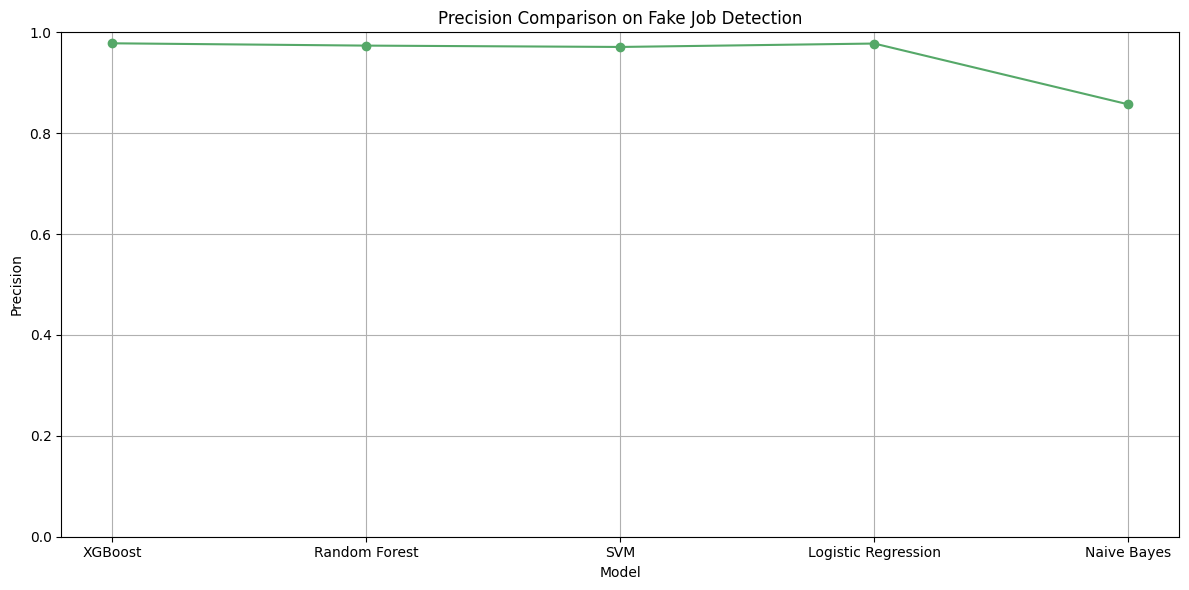

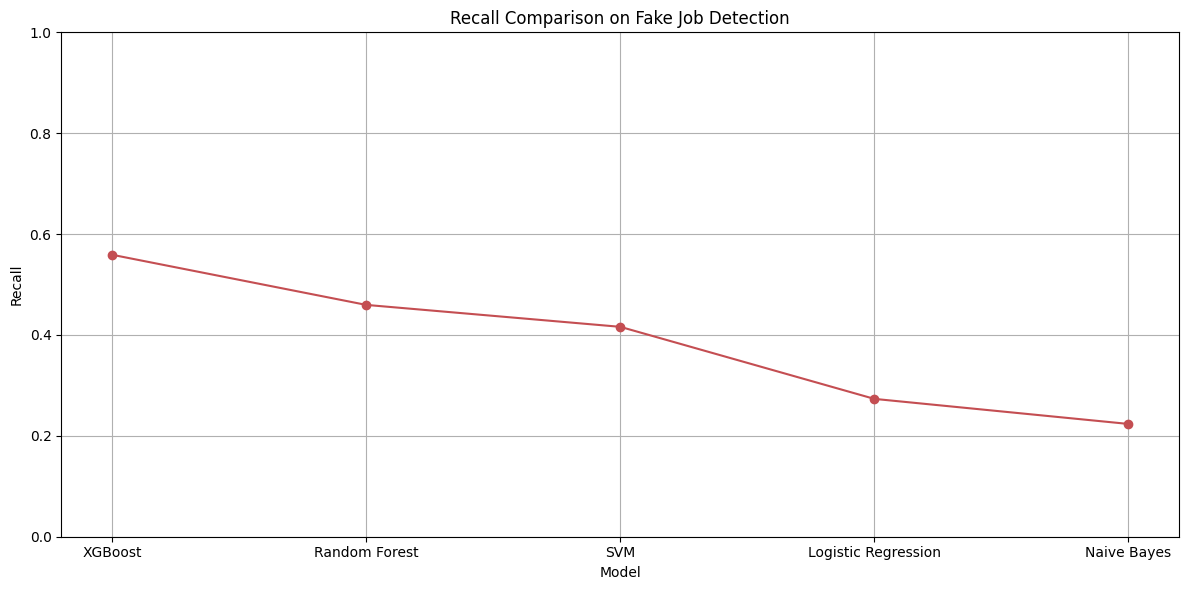

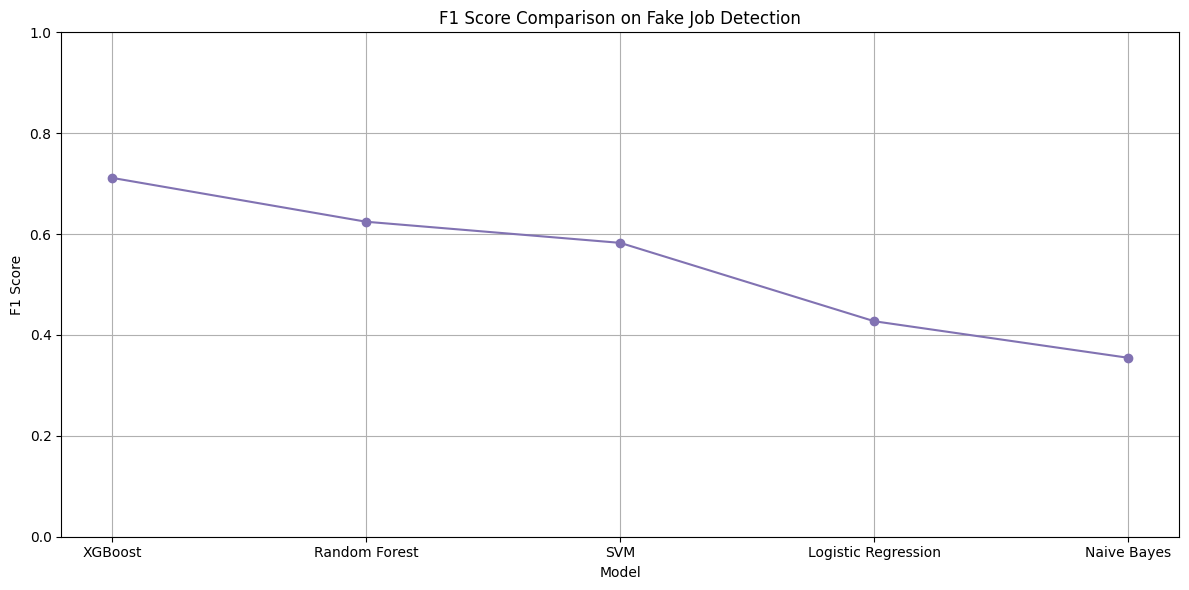

In [75]:
import matplotlib.pyplot as plt

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
colors = ["#4c72b0", "#55a868", "#c44e52", "#8172b2"]

for i, metric in enumerate(metrics):
    plt.figure(figsize=(12, 6))
    plt.plot(results_df["Model"], results_df[metric], marker='o', color=colors[i])
    plt.title(f"{metric} Comparison on Fake Job Detection")
    plt.xlabel("Model")
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.tight_layout()
    

    plt.savefig(f"../visuals/model_comparison_{metric.lower().replace(' ', '_')}.png")
    plt.show()

In [78]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
param_grid = {
    'n_estimators': [100, 200],           
    'max_depth': [3, 5, 7],               
    'learning_rate': [0.01, 0.1, 0.2],    
    'subsample': [0.8, 1],                
    'colsample_bytree': [0.8, 1]          
}

In [80]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',       
    cv=3,               
    verbose=2,
    n_jobs=-1           
)

In [81]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:22:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:22:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:22:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/prince_ds/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [13:22:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(sms

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1]},
             scoring='f1', verbose=2)

In [82]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}


In [83]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2876
           1       0.97      0.54      0.69       161

    accuracy                           0.97      3037
   macro avg       0.97      0.77      0.84      3037
weighted avg       0.97      0.97      0.97      3037

Confusion Matrix:

[[2873    3]
 [  74   87]]


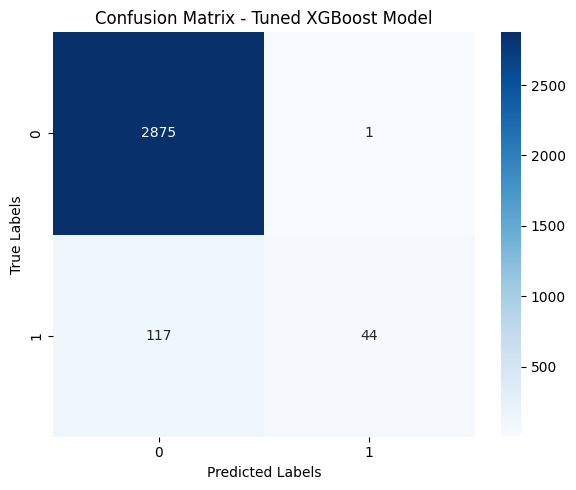

In [84]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Tuned XGBoost Model")

plt.tight_layout()
plt.savefig("../visuals/confusion_matrix_tuned_xgb.png", dpi=300)
plt.show()

In [85]:
import joblib
joblib.dump(best_model, '../model/xgb_final_model.joblib')
joblib.dump(tfidf_vectorizer, '../model/tfidf_vectorizer.joblib')

['../model/tfidf_vectorizer.joblib']

In [86]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [88]:
import streamlit as st
import joblib
import numpy as np

model = joblib.load('../model/xgb_final_model.joblib') 
vectorizer = joblib.load('../model/tfidf_vectorizer.joblib') 

st.set_page_config(page_title="Fake Job Detection", layout="centered")

st.title("🕵️‍♂️ Fake Job Posting Detector")
st.write("Enter job posting details and find out whether it's real or fake!")

title = st.text_input("Job Title")
description = st.text_area("Job Description")
requirements = st.text_area("Job Requirements")

if st.button("Predict"):
    if title.strip() == "" or description.strip() == "" or requirements.strip() == "":
        st.warning("Please fill in all the fields.")
    else:
        text = title + " " + description + " " + requirements
        text_vector = vectorizer.transform([text])
        prediction = model.predict(text_vector)[0]
        probability = model.predict_proba(text_vector)[0][int(prediction)]

        if prediction == 1:
            st.success(f"This job posting looks **Real** ✅ (Confidence: {probability:.2f})")
        else:
            st.error(f"This job posting looks **Fake** ❌ (Confidence: {probability:.2f})")

2025-07-04 13:34:36.636 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-04 13:34:36.637 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-04 13:34:36.637 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-04 13:34:36.637 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-04 13:34:36.637 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-04 13:34:36.637 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-04 13:34:36.638 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-04 13:34:36.638 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar